In [11]:
import gpxpy
import mplleaflet
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

%load_ext autoreload
%autoreload 2

# Reading a GPX file

In [2]:
with open('../gpx/3-laender-giro.gpx') as fh:
    gpx_file = gpxpy.parse(fh)

In [3]:
print("File has {} track(s)".format(len(gpx_file.tracks)))

File has 1 track(s)


In [4]:
track = gpx_file.tracks[0]
print("Track has {} segment(s)".format(len(track.segments)))

Track has 1 segment(s)


## GPX segments can be easily converted to a Pandas dataframe

In [5]:
segment = track.segments[0]
coords = pd.DataFrame([{'lat': p.latitude, 
                        'lon': p.longitude, 
                        'ele': p.elevation,
                        'time': p.time} for p in segment.points])
coords.head()

,ele,lat,lon,time
0,1343.0,46.889062,10.502119,2016-06-26 04:31:27
1,1343.0,46.889062,10.502119,2016-06-26 04:31:28
2,1343.0,46.889062,10.502119,2016-06-26 04:31:29
3,1344.0,46.889065,10.502119,2016-06-26 04:31:30
4,1345.0,46.889068,10.502121,2016-06-26 04:31:31


## Plotting a segment

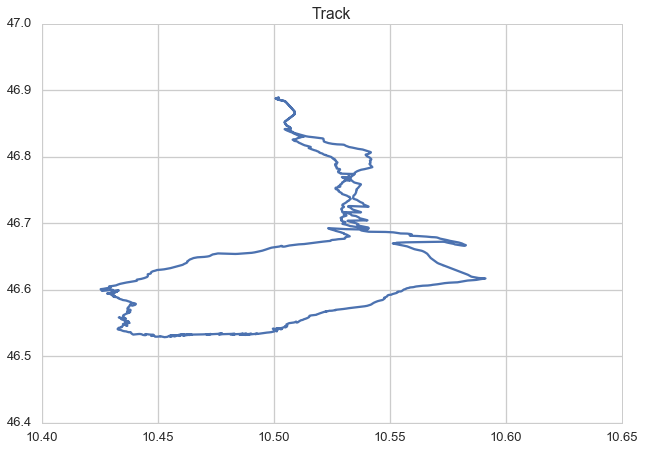

In [6]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.title("Track")

## Working with the elevation of a track

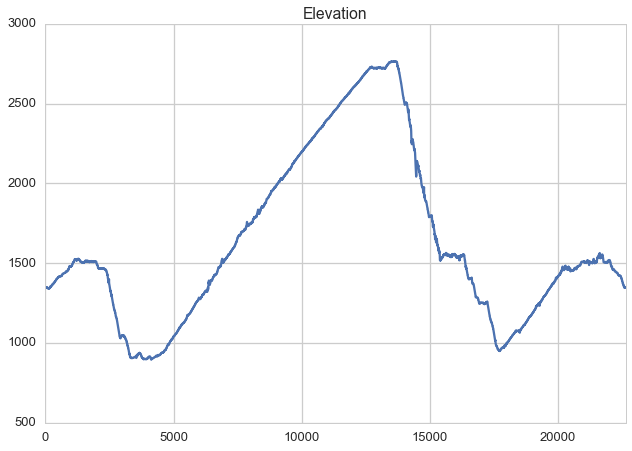

In [7]:
coords.ele.plot(title='Elevation')

### Let's assume the elevation data is missing

In [8]:
segment = segment.clone()
for point in gpx_file.tracks[0].segments[0].points:
    point.elevation = None

### Use srtm.py to add missing elevation data

In [20]:
import srtm

elevation_data = srtm.get_data()
elevation_data.add_elevations(gpx_file, smooth=True)

In [25]:
coords['new_ele'] = pd.Series([p.elevation for p in gpx_file.tracks[0].segments[0].points])

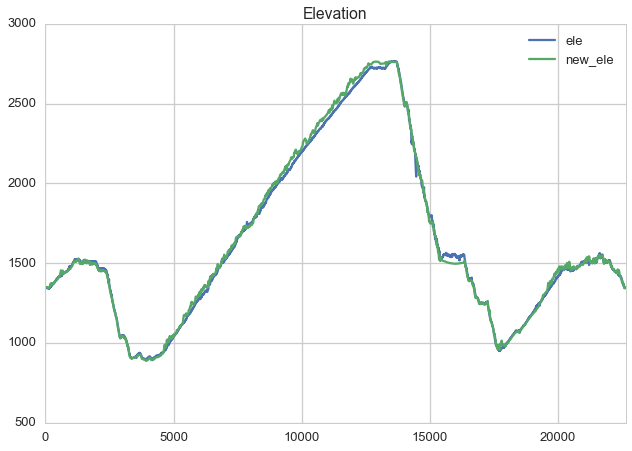

In [26]:
coords[['ele','new_ele']].plot(title='Elevation')

## Working with speeds

In [27]:
segment.points[0].speed = 0.0
segment.points[-1].speed = 0.0
gpx_file.add_missing_speeds()

In [28]:
coords['speed'] = [p.speed for p in segment.points]

In [29]:
start_time, end_time = segment.get_time_bounds()
duration = end_time - start_time

In [34]:
average_speed = segment.length_3d() / duration.seconds * 3.6
print("Average speed is {:.2f} km/h".format(average_speed))

Average speed is 20.05 km/h


## What about uphill and downhill distances?

In [35]:
segment.get_uphill_downhill()

UphillDownhill(uphill=4446.100000000043, downhill=4439.100000000031)

### Can this be true??? Not really!!!